In [2]:
import pandas as pd

url = 'https://github.com/ironhack-labs/lab-customer-analysis-round-2/raw/master/files_for_lab/csv_files/marketing_customer_analysis.csv'
df = pd.read_csv(url)

In [3]:
df.head(6) #comprobando que se ha cargado correctamente

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A


In [4]:
df.shape #shape of dataframe

(10910, 26)

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_') #standarize columns names

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Numerical Columns: ", numerical_columns)
print("Categorical Columns:", categorical_columns) #Identify categorical and numerical columns

Numerical Columns:  Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')
Categorical Columns: Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')


In [7]:
df = df.dropna() #checking and dealing with NaN Values

In [8]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['month'] = df['effective_to_date'].dt.month

filtered_data = df[df['month'].isin([1, 2, 3])]
print("Data for the first quarter:")
print(filtered_data) #Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March

Data for the first quarter:
       unnamed:_0 customer       state  customer_lifetime_value response  \
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
10             10  HG93801     Arizona              5154.764074       No   
13             13  KR82385  California              5454.587929       No   
16             16  FH51383  California              5326.677654       No   
...           ...      ...         ...                      ...      ...   
10902       10902  PP30874  California              3579.023825       No   
10903       10903  SU71163     Arizona              2771.663013       No   
10904       10904  QI63521      Nevada             19228.463620       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10908       10908  WA60547  California             11971.977650       No   

       coverage             education effective_to_date emp

C:\Users\User\AppData\Local\Temp\ipykernel_14264\2058185268.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])


In [9]:
def process_data(url):
    df = pd.read_csv(url) #BONUS: Put all the previously mentioned data transformations into a function.

    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    numerical_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    df = df.dropna()
    
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
    df['month'] = df['effective_to_date'].dt.month
    filtered_data = df[df['month'].isin([1, 2, 3])]
    
    return df, filtered_data

In [10]:
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [11]:
filtered_data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [12]:
df, filtered_data

(       unnamed:_0 customer       state  customer_lifetime_value response  \
 2               2  LZ68649  Washington             14947.917300       No   
 3               3  XL78013      Oregon             22332.439460      Yes   
 10             10  HG93801     Arizona              5154.764074       No   
 13             13  KR82385  California              5454.587929       No   
 16             16  FH51383  California              5326.677654       No   
 ...           ...      ...         ...                      ...      ...   
 10902       10902  PP30874  California              3579.023825       No   
 10903       10903  SU71163     Arizona              2771.663013       No   
 10904       10904  QI63521      Nevada             19228.463620       No   
 10906       10906  KX53892      Oregon              5259.444853       No   
 10908       10908  WA60547  California             11971.977650       No   
 
        coverage             education effective_to_date employmentstatus 

## Customer Analysis Round 3

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

In [14]:
df.info

<bound method DataFrame.info of        unnamed:_0 customer       state  customer_lifetime_value response  \
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
10             10  HG93801     Arizona              5154.764074       No   
13             13  KR82385  California              5454.587929       No   
16             16  FH51383  California              5326.677654       No   
...           ...      ...         ...                      ...      ...   
10902       10902  PP30874  California              3579.023825       No   
10903       10903  SU71163     Arizona              2771.663013       No   
10904       10904  QI63521      Nevada             19228.463620       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10908       10908  WA60547  California             11971.977650       No   

       coverage             education effective_to_date

In [15]:
df.describe(include='all')

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
count,4543.000000,4543,4543,4543.000000,4543,4543,4543,4543,4543,4543,...,4543.000000,4543,4543,4543,4543,4543.000000,4543,4543,4543,4543.000000
unique,NaN,4543,5,NaN,2,3,5,NaN,5,2,...,NaN,3,9,4,4,NaN,6,3,1,NaN
top,NaN,LZ68649,California,NaN,No,Basic,Bachelor,NaN,Employed,F,...,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,A,NaN
freq,NaN,1,1552,NaN,3902,2759,1374,NaN,2831,2326,...,NaN,3390,1730,1849,1751,NaN,2277,3187,4543,NaN
mean,5540.241250,NaN,NaN,8033.714059,NaN,NaN,NaN,2011-01-29 19:29:56.434074368,NaN,NaN,...,2.980189,NaN,NaN,NaN,NaN,436.477525,NaN,NaN,NaN,1.469734
min,2.000000,NaN,NaN,1904.000852,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,NaN,1.000000
25%,2884.000000,NaN,NaN,4039.089902,NaN,NaN,NaN,2011-01-16 00:00:00,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,265.686145,NaN,NaN,NaN,1.000000
50%,5549.000000,NaN,NaN,5846.520588,NaN,NaN,NaN,2011-01-30 00:00:00,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,384.000000,NaN,NaN,NaN,1.000000
75%,8283.000000,NaN,NaN,8936.596938,NaN,NaN,NaN,2011-02-13 00:00:00,NaN,NaN,...,4.000000,NaN,NaN,NaN,NaN,552.000000,NaN,NaN,NaN,2.000000
max,10908.000000,NaN,NaN,83325.381190,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,2893.239678,NaN,NaN,NaN,2.000000


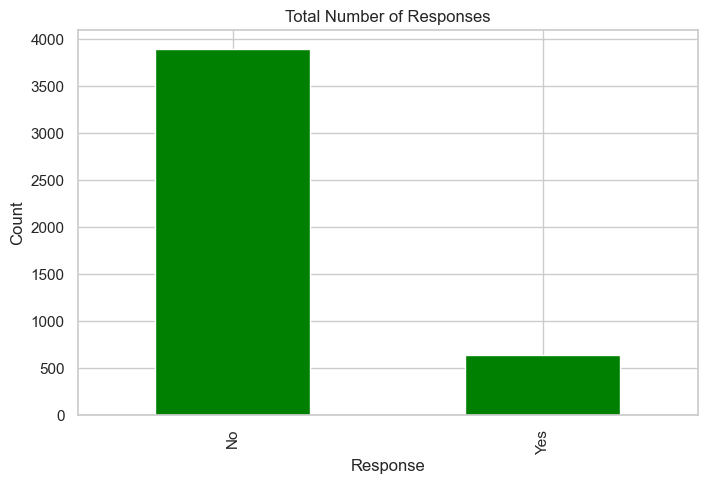

In [16]:
plt.figure(figsize=(8, 5))             #Show a plot of the total number of responses.
df['response'].value_counts().plot(kind='bar', color='green')
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [17]:
plt.figure(figsize=(8, 5))                #Show a plot of the response rate by the sales channel.
response_rate_by_channel = df.groupby('sales_channel')['response'].mean()
response_rate_by_channel.plot(kind='bar', color='lightcoral')
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.show() #SHOWS AN ERROR , IN THE NEXT STEP WE ARE GOING TO FIX IT

TypeError: Could not convert NoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoYesNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoYesNoYesNoYesNoNoYesNoNoYesNoNoNoYesNoYesNoNoYesYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesNo to numeric

<Figure size 800x500 with 0 Axes>

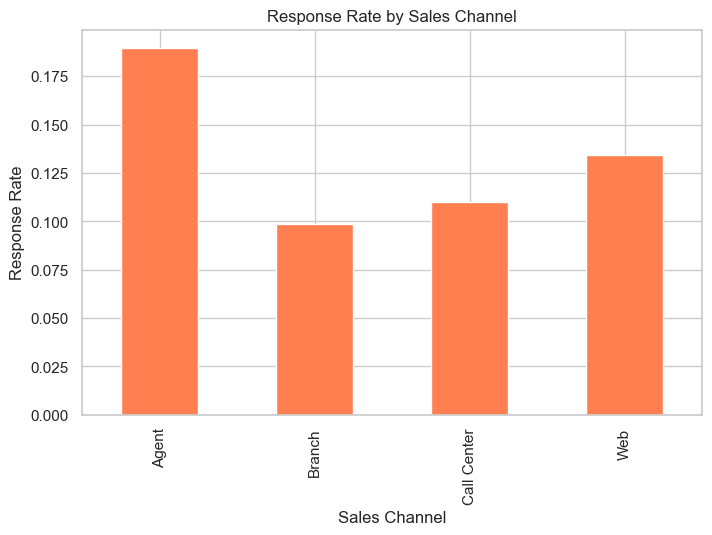

In [18]:
plt.figure(figsize=(8, 5))

df['response_numeric'] = df['response'].map({'Yes': 1, 'No': 0})                   # Convert 'Yes' y 'No' to 1 and 0 in the column 'response' (That's why we were getting an error earlier)

response_rate_by_channel = df.groupby('sales_channel')['response_numeric'].mean()      # Calculate the response rate by sales channel

response_rate_by_channel.plot(kind='bar', color='coral')

plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.show()

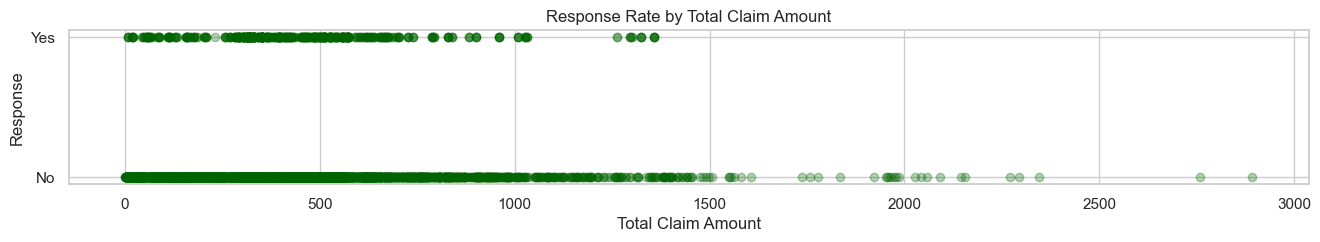

In [19]:
plt.figure(figsize=(16, 2))                  #Show a plot of the response rate by the total claim amount.
plt.scatter(df['total_claim_amount'], df['response'], alpha=0.3, color='darkgreen')
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Response')
plt.show()

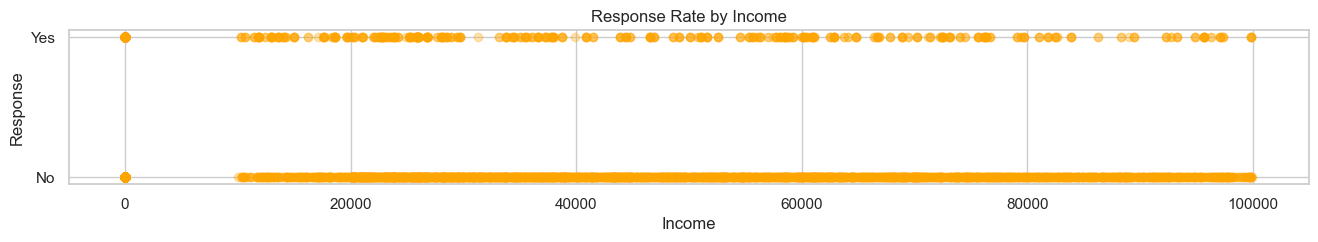

In [20]:
plt.figure(figsize=(16, 2))       #Show a plot of the response rate by income.
plt.scatter(df['income'], df['response'], alpha=0.3, color='orange')
plt.title('Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Response')
plt.show()

## Customer Analysis Round 4

In [21]:
df.dtypes

unnamed:_0                                int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [22]:
numerical = df.select_dtypes(include='number')
numerical

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_numeric
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087,1,0
13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000,1,0
16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,3579.023825,28304,91,10.0,30,2.0,1,655.200000,1,0
10903,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1,0
10904,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2,0
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0


In [23]:
categoricals = df.select_dtypes(include='object')
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


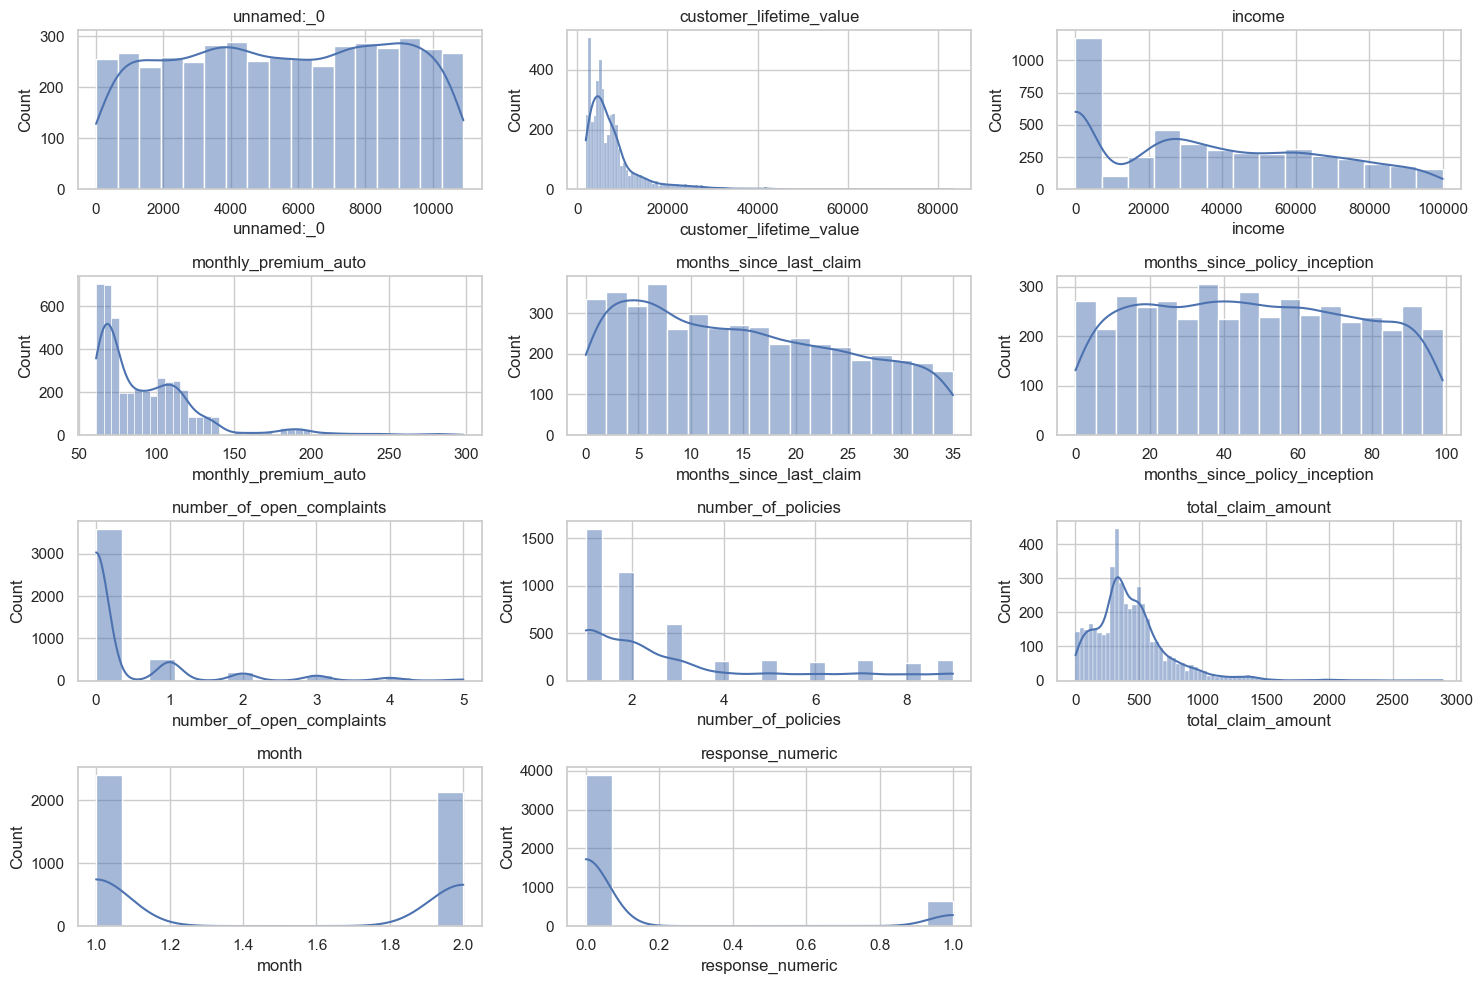

In [24]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical.columns):
        plt.subplot(4, 3, i + 1)
        sns.histplot(numerical[column], kde=True)
        plt.title(column)
plt.tight_layout()
plt.show()

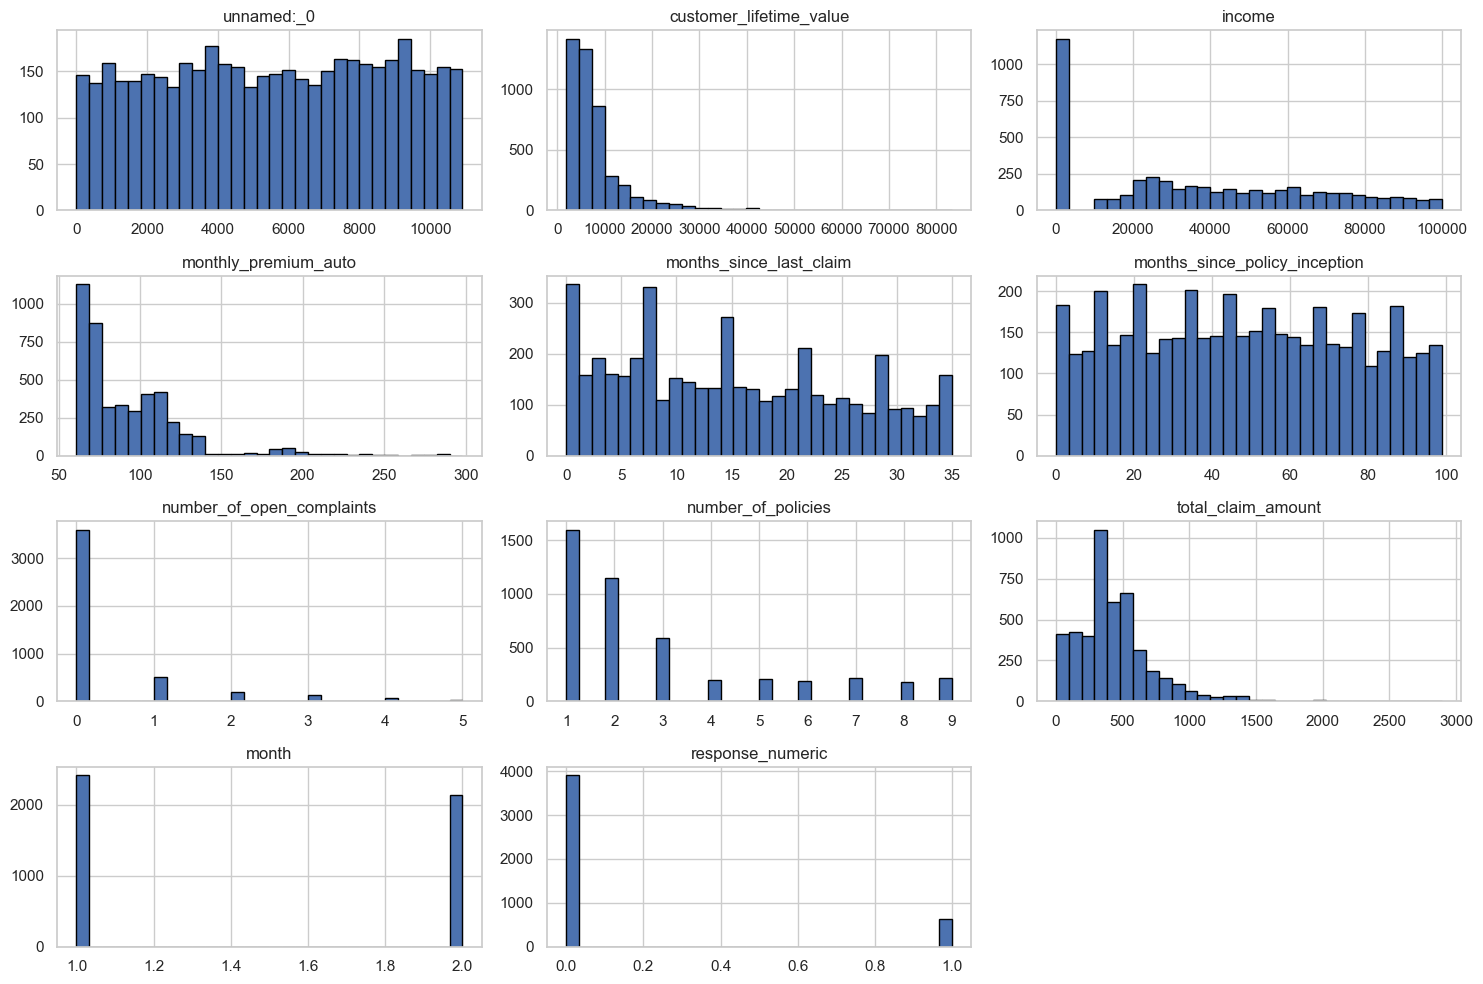

In [25]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical.columns):
        plt.subplot(4, 3, i + 1)
        plt.hist(numerical[column], bins=30, edgecolor='black')
        plt.title(column)
plt.tight_layout()
plt.show()

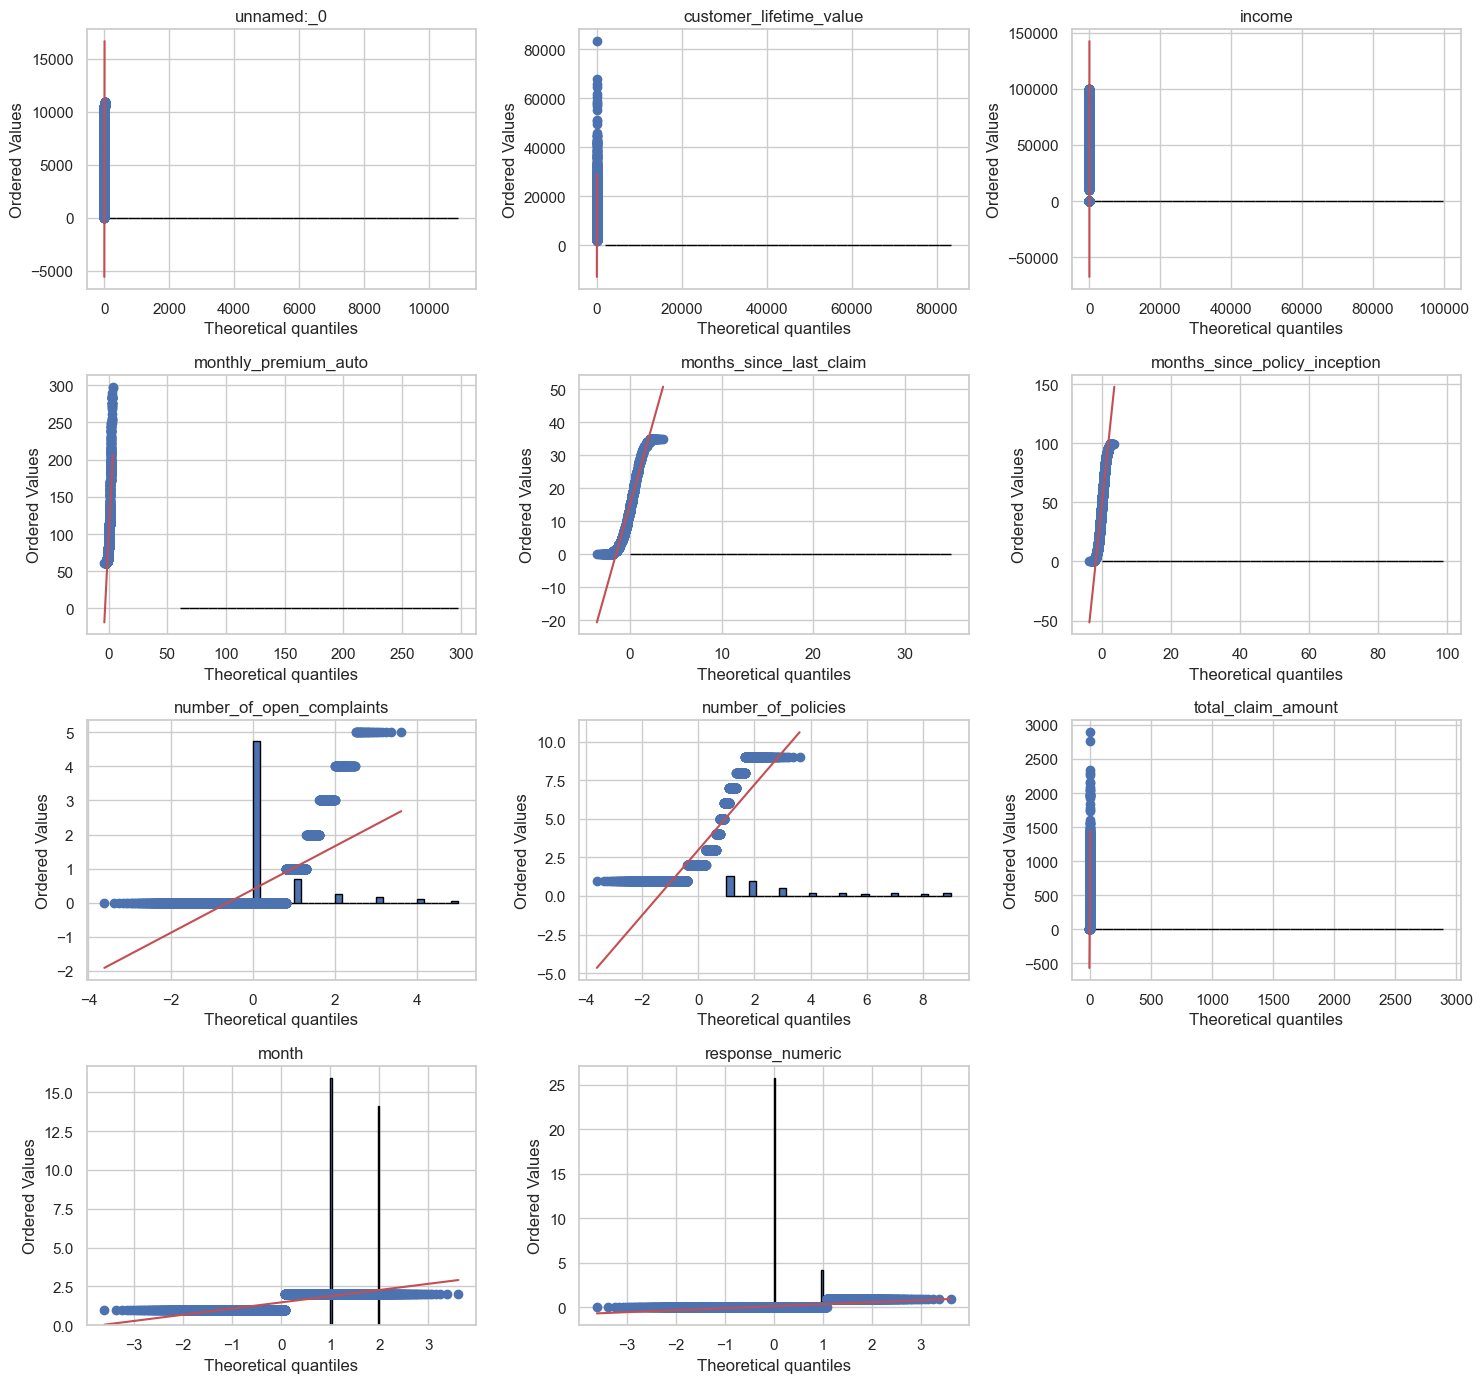

In [26]:
import scipy.stats as stats

plt.figure(figsize=(15, 14))
for i, column in enumerate(numerical.columns):
    plt.subplot(4, 3, i + 1)  # Ajuste a 4 filas y 3 columnas
    plt.hist(numerical[column], bins=30, edgecolor='black', density=True)
    stats.probplot(numerical[column], dist="norm", plot=plt)
    plt.title(column)

plt.tight_layout()
plt.show()


In [27]:
correlation_matrix = numerical.corr()
correlation_matrix

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_numeric
unnamed:_0,1.000000,0.018506,0.002476,-0.002327,-0.012626,0.016022,-0.007972,-0.004518,-0.008315,-0.001406,-0.010227
customer_lifetime_value,0.018506,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579,-0.020217,-0.018783
income,0.002476,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311,0.004593,0.019743
monthly_premium_auto,-0.002327,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894,-0.002390,0.013683
months_since_last_claim,-0.012626,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449,-0.010319,-0.013800
months_since_policy_inception,0.016022,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610,0.003928,-0.005092
number_of_open_complaints,-0.007972,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433,0.005646,-0.008796
number_of_policies,-0.004518,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864,0.025147,-0.015159
total_claim_amount,-0.008315,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000,-0.004340,0.018033
month,-0.001406,-0.020217,0.004593,-0.002390,-0.010319,0.003928,0.005646,0.025147,-0.004340,1.000000,-0.030532


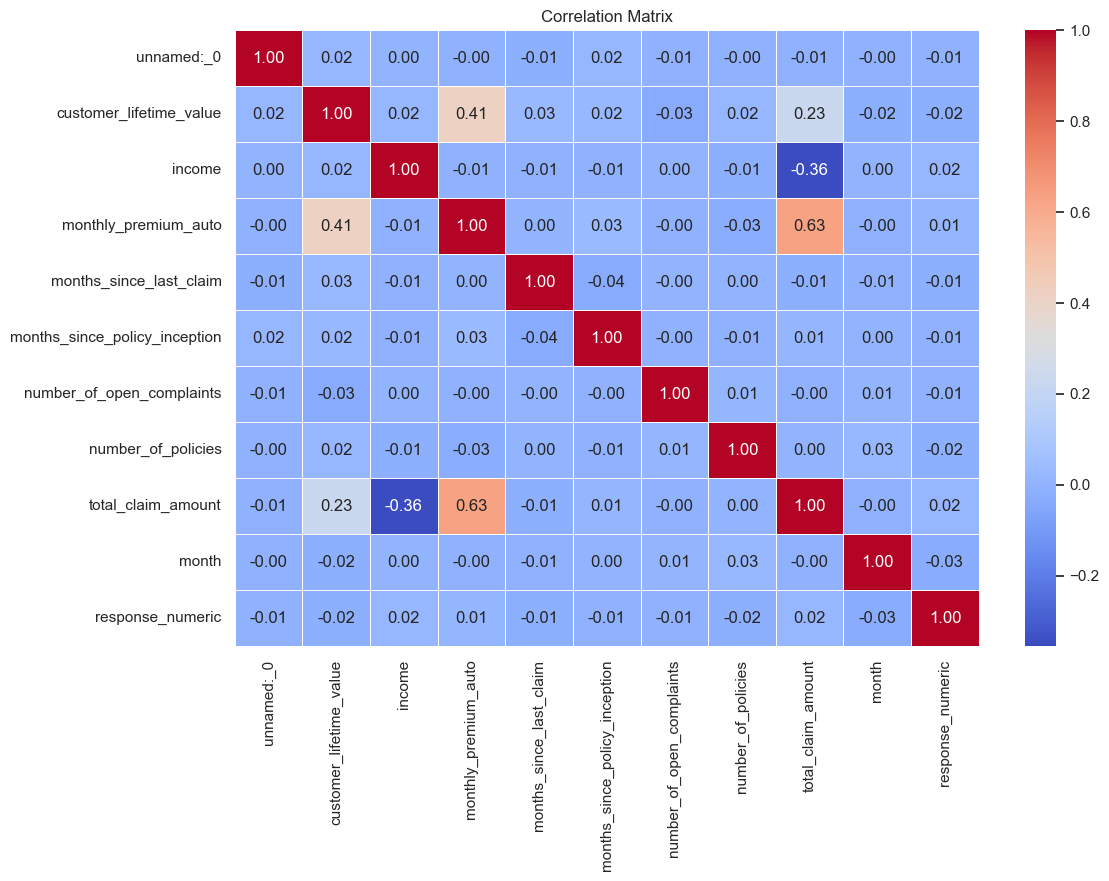

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [29]:
high_corr_features = np.where(np.abs(correlation_matrix) > 0.9)

In [30]:
high_corr_features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))

## Customer analysis round 5 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('total_claim_amount', axis=1)  #total claim amount because in analysis round 4, said: Please note that we will use the column total_claim_amount later as the target variable.
y = df['total_claim_amount']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [32]:
print("X_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_train:")
print(y_train.head())
print("\ny_test:")
print(y_test.head())

X_train:
       unnamed:_0 customer       state  customer_lifetime_value response  \
10621    1.618453  JM93892     Arizona                -0.301100       No   
7061     0.479199  UF28233  Washington                -0.403285       No   
4570    -0.317959  IJ26642      Nevada                -0.419195      Yes   
3695    -0.597972  EK13316     Arizona                -0.376029       No   
5720     0.050059  RQ22171  California                -0.579099       No   

      coverage             education effective_to_date employmentstatus  \
10621    Basic               College        2011-02-02         Employed   
7061     Basic  High School or Below        2011-02-03         Employed   
4570     Basic              Bachelor        2011-01-26         Employed   
3695     Basic              Bachelor        2011-02-11         Employed   
5720     Basic  High School or Below        2011-01-30       Unemployed   

      gender  ...  number_of_policies     policy_type        policy  \
10621      M

## Customer analysis round 6

In [35]:
categorical_encoded = pd.get_dummies(df)


In [37]:
processed_df = pd.concat([numerical, categorical_encoded], axis=1)


In [46]:
processed_df.head(5)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_A
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,...,False,False,False,True,False,False,False,True,False,True
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,...,True,False,False,False,False,False,False,True,False,True
10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087,1,...,False,False,False,True,False,False,True,False,False,True
13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000,1,...,False,False,False,False,False,True,False,True,False,True
16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579,2,...,False,False,False,False,False,True,True,False,False,True


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Suponiendo que 'target_column' es el nombre de tu columna objetivo
X = processed_df.drop('total_claim_amount', axis=1)
y = processed_df['total_claim_amount']

X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


TypeError: Converting from datetime64[ns] to int32 is not supported. Do obj.astype('int64').astype(dtype) instead

In [47]:
print(X_train.dtypes)


unnamed:_0                      int64
customer_lifetime_value       float64
income                          int64
monthly_premium_auto            int64
months_since_last_claim       float64
                               ...   
vehicle_class_Two-Door Car       bool
vehicle_size_Large               bool
vehicle_size_Medsize             bool
vehicle_size_Small               bool
vehicle_type_A                   bool
Length: 4622, dtype: object


In [48]:
print(type(y_train))


<class 'pandas.core.frame.DataFrame'>


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df[['unnamed:_0', 'customer_lifetime_value', 'income',
        'monthly_premium_auto', 'months_since_last_claim',
        'months_since_policy_inception', 'number_of_open_complaints',
        'number_of_policies', 'state', 'coverage', 'education',
        'employmentstatus', 'gender', 'location_code',
        'marital_status', 'policy_type', 'policy', 'renew_offer_type',
        'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']]
y = df['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = ['unnamed:_0', 'customer_lifetime_value', 'income',
                  'monthly_premium_auto', 'months_since_last_claim',
                  'months_since_policy_inception', 'number_of_open_complaints',
                  'number_of_policies']

categorical_cols = ['state', 'coverage', 'education',
                    'employmentstatus', 'gender', 'location_code',
                    'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                    'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


R2 Score: 0.7398555525294492
Mean Squared Error (MSE): 20772.805925155535
Root Mean Squared Error (RMSE): 144.1277416917213
Mean Absolute Error (MAE): 96.83896182270328


## Customer analysis round 7